# 相关性锥

观察两个资产相关性的变化即百分位水平

In [3]:
from WindPy import w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [5]:
today = datetime.datetime.today()

In [11]:
data = w.wsd('881001.WI,CCFI.WI', 'close', '2004-01-01', today)

In [12]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [13]:
df.tail()

,881001.WI,CCFI.WI
2018-08-27,3720.6677,1179.8722
2018-08-28,3720.0170,1196.3617
2018-08-29,3701.5104,1195.7036
2018-08-30,3653.3684,1182.1566
2018-08-31,3653.3684,1182.1566


In [20]:
ret_df = df.pct_change()

In [24]:
ret_df.tail()

,881001.WI,CCFI.WI
2018-08-27,0.022456,-0.008964
2018-08-28,-0.000175,0.013976
2018-08-29,-0.004975,-0.000550
2018-08-30,-0.013006,-0.011330
2018-08-31,0.000000,0.000000


In [25]:
corr = df['881001.WI'].rolling(243).corr(df['CCFI.WI'])

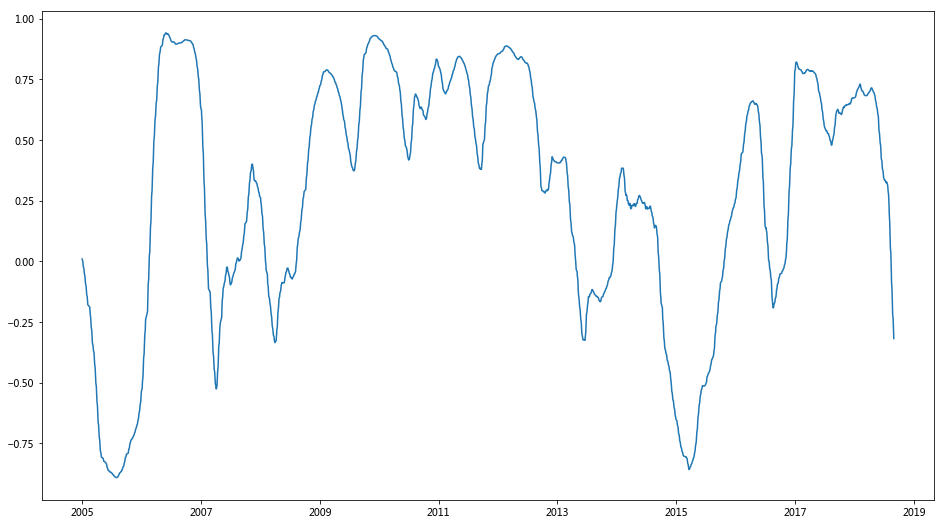

In [26]:
plt.figure(figsize=(16, 9))
plt.plot(corr)

In [27]:
ks = range(20, 500, 10)
cdf = pd.DataFrame(index=df.index)

In [28]:
for look_back in ks:
    cdf['%d days corr'%(look_back)] = ret_df['881001.WI'].rolling(window=look_back).corr(ret_df['CCFI.WI'])

In [29]:
today = df.index[-1]

In [31]:
col_df = pd.DataFrame({'days': ks, 
                        'corr': cdf.loc[today].values,
                        'max': cdf.max(axis=0).values, 
                        'min': cdf.min(axis=0).values,
                        'median': cdf.median(axis=0).values,
                        'percent_75': cdf.quantile(0.75, axis=0).values,
                        'percent_25': cdf.quantile(0.25, axis=0).values})

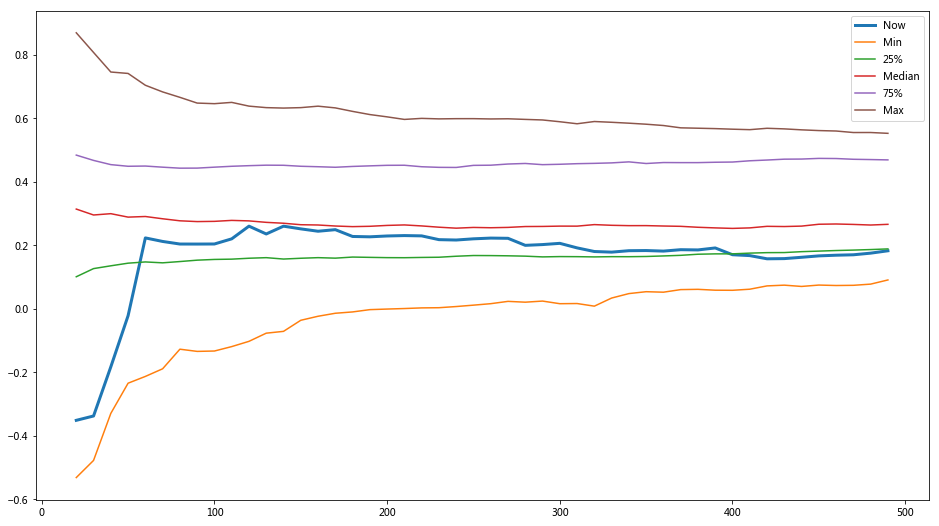

In [33]:
plt.figure(figsize=(16, 9))
plt.plot(col_df['days'], col_df['corr'], linewidth=3, label='Now')
plt.plot(col_df['days'], col_df['min'], label='Min')
plt.plot(col_df['days'], col_df['percent_25'], label='25%')
plt.plot(col_df['days'], col_df['median'], label='Median')
plt.plot(col_df['days'], col_df['percent_75'], label='75%')
plt.plot(col_df['days'], col_df['max'], label='Max')
plt.legend()